In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


#Loading the dataset for students performance
students_performance=pd.read_csv("StudentsPerformance.csv")
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
#Trying to check the size of dataset
students_performance.shape
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


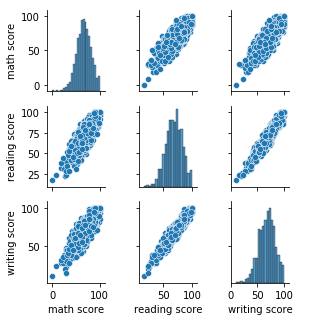

In [3]:
#getting insight on with correlation between students's performance through dataset
sns.pairplot(students_performance[['math score', 'reading score', 'writing score']], height = 1.5)

In [4]:
#adding columns for grade marks for each exam:

#>85 = A, >60 = B, >59 = C, >46 = D, <=45 = F

def ScoreMark(score):
    if ( score > 85 ):
        mark = 'A'
    elif ( score > 60):
        mark = 'B'
    elif ( score > 59):
        mark = 'C'
    elif ( score > 46):
        mark = 'D'
    else:
        mark = 'F'
    return mark

students_performance['math mark'] = students_performance['math score'].apply(lambda s: ScoreMark(s))
students_performance['reading mark'] = students_performance['reading score'].apply(lambda s: ScoreMark(s))
students_performance['writing mark'] = students_performance['writing score'].apply(lambda s: ScoreMark(s))


In [5]:
def boxpl(dt, x_cols, y_cols):
    j = 1
    x_cnt = len(x_cols)
    y_cnt = len(y_cols)
    figure = plt.figure(figsize=(17, 5 * x_cnt))
    for x_ax in x_cols:
        for i in y_cols:
            ax = figure.add_subplot(x_cnt, y_cnt, j)
            #ax.set_title(i)
            k = sns.boxplot(x = dt[x_ax], y = dt[i])
            k.set_xticklabels(k.get_xticklabels(), rotation=20)
            j = j + 1

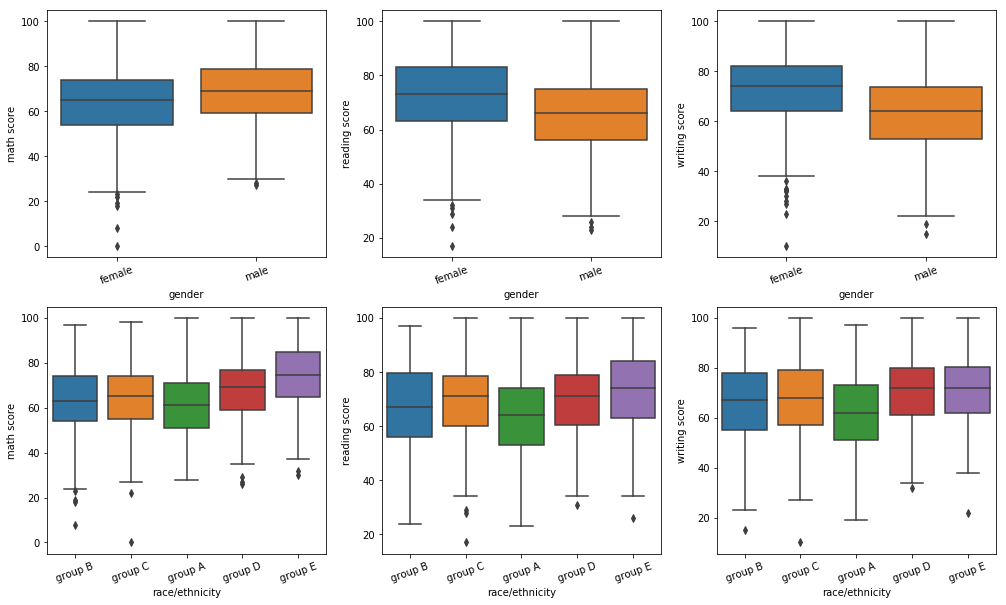

In [6]:
#Check exam score quartiles allocation for gender and race
y_cols = ['math score', 'reading score', 'writing score']
x_cols = ['gender', 'race/ethnicity']
boxpl(students_performance, x_cols, y_cols)

In [7]:
#Predicting student exam failures with Classification methods
#Import libraries from sklearn for prediction of student exam failures with Classification model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
#We are defining function that takes a grade mark and returns the number of students 
#that have the given grade for each exam.
def getMarkData(dt, marks):
    subDt = dt[(dt['math mark'].isin(marks)) | (dt['reading mark'].isin(marks)) | (dt['writing mark'].isin(marks))]
    return subDt
    
def MarkCounts(dt, marks):
    subDt = getMarkData(dt, marks)
    print('Math: ' + str(subDt[subDt['math mark'].isin(marks)].shape[0])
      , '\n'
      , 'Writing: ' + str(subDt[subDt['writing mark'].isin(marks)].shape[0])
      , '\n'
      , 'Reading: ' + str(subDt[subDt['reading mark'].isin(marks)].shape[0])
      , '\n'
      , '\n'
      , 'Math and Reading: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['reading mark'].isin(marks))].shape[0])
      , '\n'
      , 'Math and Writing: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      ,'Reading and Writing: ' + str(subDt[(subDt['reading mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      , '\n',
      'All: '+str(subDt[(subDt['math mark'].isin(marks))&(subDt['reading mark'].isin(marks))&(subDt['writing mark'].isin(marks))].shape[0])
     )

In [9]:
#The additional column representing the pass or failure classes, depending on where the performance 
#belongs to.
def hasFailed(dt):
    if ((dt['math mark'] == 'F') | (dt['reading mark'] == 'F') | (dt['writing mark'] == 'F')):
        return 1
    else:
        return 0
students_performance['failed'] = students_performance.apply(hasFailed, axis=1)

In [10]:
#Add one hot encoding: transform textual variables into binaries
classification = students_performance[[
                              'gender'
                            , 'race/ethnicity'
                            , 'parental level of education'
                            , 'lunch'
                            , 'test preparation course'
                            , 'failed'
                           ]]

In [11]:
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math mark,reading mark,writing mark,failed
0,female,group B,bachelor's degree,standard,none,72,72,74,B,B,B,0
1,female,group C,some college,standard,completed,69,90,88,B,A,A,0
2,female,group B,master's degree,standard,none,90,95,93,A,A,A,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,D,D,F,1
4,male,group C,some college,standard,none,76,78,75,B,B,B,0


In [12]:
#Splitting new dataset into X and Y variables
y = students_performance.failed
y.describe

<bound method NDFrame.describe of 0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      1
8      0
9      1
10     0
11     1
12     0
13     0
14     0
15     0
16     0
17     1
18     1
19     0
20     0
21     0
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    1
979    0
980    1
981    0
982    0
983    0
984    0
985    0
986    1
987    0
988    1
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: failed, Length: 1000, dtype: int64>

In [13]:
X = students_performance.drop(['failed'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math mark,reading mark,writing mark
0,female,group B,bachelor's degree,standard,none,72,72,74,B,B,B
1,female,group C,some college,standard,completed,69,90,88,B,A,A
2,female,group B,master's degree,standard,none,90,95,93,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,D,D,F
4,male,group C,some college,standard,none,76,78,75,B,B,B


In [14]:
X = pd.get_dummies(X)
X.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,...,reading mark_A,reading mark_B,reading mark_C,reading mark_D,reading mark_F,writing mark_A,writing mark_B,writing mark_C,writing mark_D,writing mark_F
0,72,72,74,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,69,90,88,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,90,95,93,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,47,57,44,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,76,78,75,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [15]:
#Trying to perform 80/20 Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [16]:
#Checking the dimension of our data
X_train.shape, y_train.shape

((700, 35), (700,))

In [17]:
X_test.shape, y_test.shape

((300, 35), (300,))

In [18]:
classifier = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier(max_depth=1234) 
classifier.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1234)

In [19]:
#The final step is to make predictions on our test data.
c_y_pred = classifier.predict(X_test)
d_y_pred = decision_tree.predict(X_test)

print('\n Classifier', c_y_pred[0:30]
      , '\n decision tree', d_y_pred[0:30])


 Classifier [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] 
 decision tree [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
#check accuracy of our model on the test data
c_y_pred = classifier.score(X_test, y_test)

d_y_pred = decision_tree.score(X_test, y_test)

print('\n Accuracy of our Knn Classifier model is', c_y_pred
     , '\n Accuracy of our decition tree model is' , d_y_pred)


 Accuracy of our Knn Classifier model is 0.9833333333333333 
 Accuracy of our decition tree model is 1.0


In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
dt_cv = DecisionTreeClassifier(max_depth=2)

#train model with cv of 5 
knn_cv_scores = cross_val_score(knn_cv, X, y, cv=5)
dt_cv_scores = cross_val_score(dt_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(knn_cv_scores)
print(dt_cv_scores)

[0.99  0.995 0.98  0.995 0.995]
[0.99 1.   1.   1.   0.99]
